# Introduction to Data Science, Lab 7 (10/28)
- Bias-Variance trade-off in statistical learning theory;
- Bias-Variance trade-off in paractice using SVMs with RBF kernels
- Predict the outcome of the 2020 elections!

### *Bias-Variance trade-off in SLT*

Recall the terminology of statistical decision theory from Lab3 (statistical/empirical risk, loss, decision function, Bayes function, etc.) In particular, it is important to remember that $\mathcal{R}(\hat{f}_{\mathcal{F},\mathcal{D}})=\mathbb{E}_{(X,Y)\sim P}\mathcal{L}(\hat{f}_{\mathcal{F},\mathcal{D}}(X),Y)$ for some fixed hypothesis space $\mathcal{F}$ (here, $\hat{f}_{\mathcal{F},\mathcal{D}}$ denotes any function from $\mathcal{F}$ obtained in a data-dependent way; this is in contrast with Lab3, where we used this notation to refer to the empirical risk minimizer). Note that for a fixed dataset $\mathcal{D}=\{(X_i,Y_i)\sim P_{X\times Y}\colon (X_i,Y_i)\perp(X_j,Y_j) \text{ for } i\ne j\}$ the above risk is a scalar; however, in general, $\mathcal{D}$ is itself a random vector, so we can ask about the *expected risk* $\mathbb{E}_{\mathcal{D}\sim P_n}\mathcal{R}(\hat{f}_{\mathcal{F},\mathcal{D}})$ over datatsets $\mathcal{D}\sim P_n$ (where $P_n$ is the joint distribution of $n$ independent copies of $P_{X\times Y}$). For now, assume that $\mathcal{L}$ is a squared loss, i.e. $\mathcal{L}(a,b)=(a-b)^2$. Moreover, define the following objects:
- Let $\bar{y}\colon\mathcal{X}\rightarrow\mathbb{R}$ be a function defined by $\bar{y}(x)=\mathbb{E}_{Y|X=x}Y$ (you will show that this is the Bayes decision function in the next Homework);
- Let $\bar{f_{\mathcal{F}}}=\mathbb{E}_{D\sim P_n}\hat{f}_{\mathcal{F},\mathcal{D}}$  taken pointwise, i.e. for any $x\in\mathcal{X}$, we have $\bar{f_{\mathcal{F}}}(x)=\mathbb{E}_{D\sim P_n}\hat{f}_{\mathcal{F},\mathcal{D}}(x)$. Do we always have $\bar{f_{\mathcal{F}}}\in\mathcal{F}$?

Now, let's compute the expected risk $\mathbb{E}_{\mathcal{D}\sim P_n}\mathcal{R}(\hat{f}_{\mathcal{F},\mathcal{D}})$. We have

\begin{align}
\mathbb{E}_{\mathcal{D}\sim P_n}\mathcal{R}\left(\hat{f}_{\mathcal{F},\mathcal{D}}\right)&=\mathbb{E}_{\mathcal{D}\sim P_n}\mathbb{E}_{(X,Y)\sim P}\mathcal{L}\left(\hat{f}_{\mathcal{F},\mathcal{D}}(X),Y\right)=\mathbb{E}_{\mathcal{D}\sim P_n}\mathbb{E}_{(X,Y)\sim P}\left(\hat{f}_{\mathcal{F},\mathcal{D}}(X)-\bar{f}_{\mathcal{F}}(X)+\bar{f}_{\mathcal{F}}(X)-Y\right)^2\\
&=\mathbb{E}_{\mathcal{D}\sim P_n}\left(\mathbb{E}_{(X,Y)\sim P}\left(\hat{f}_{\mathcal{F},\mathcal{D}}(X)-\bar{f}_{\mathcal{F}}(X)\right)^2+2\mathbb{E}_{(X,Y)\sim P}\left(\hat{f}_{\mathcal{F},\mathcal{D}}(X)-\bar{f}_{\mathcal{F}}(X)\right)\left(\bar{f}_{\mathcal{F}}(X)-Y\right)+\mathbb{E}_{(X,Y)\sim P}\left(\bar{f}_{\mathcal{F}}(X)-Y\right)^2\right).
\end{align}

The second term is, in fact, zero. To show this, we will need to exchange the order of expectation (interchange $\mathbb{E}_{D\sim P_n}$ and $\mathbb{E}_{(X,Y)\sim P}$), which is possible under certain conditions on functions $\hat{f}_{\mathcal{F},\mathcal{D}}$ and $\bar{f}_{\mathcal{F}}$ required by the Fubini's theorem. In most practical scenarios, these conditions are satisfied. Hence, we have

\begin{align}
\mathbb{E}_{\mathcal{D}\sim P_n}\mathbb{E}_{(X,Y)\sim P}\left(\hat{f}_{\mathcal{F},\mathcal{D}}(X)-\bar{f}_{\mathcal{F}}(X)\right)\left(\bar{f}_{\mathcal{F}}(X)-Y\right)&=\mathbb{E}_{(X,Y)\sim P}\mathbb{E}_{\mathcal{D}\sim P_n}\left(\hat{f}_{\mathcal{F},\mathcal{D}}(X)-\bar{f}_{\mathcal{F}}(X)\right)\left(\bar{f}_{\mathcal{F}}(X)-Y\right)\\
&=\mathbb{E}_{(X,Y)\sim P}\left[\left(\bar{f}_{\mathcal{F}}(X)-Y\right)\mathbb{E}_{\mathcal{D}\sim P_n}\left(\hat{f}_{\mathcal{F},\mathcal{D}}(X)-\bar{f}_{\mathcal{F}}(X)\right)\right]=0.
\end{align}

Therefore, the identity for $\mathbb{E}_{\mathcal{D}\sim P_n}\mathcal{R}\hat{f}_{\mathcal{F},\mathcal{D}}$ now has involves only two interpretable termns. We will remember this result and save it for later. However, we will show that it is also possible to rewrite the last term in a more meaningful form:

\begin{align}
\mathbb{E}_{(X,Y)\sim P}\left(\bar{f}_{\mathcal{F}}(X)-Y\right)^2&=\mathbb{E}_{(X,Y)\sim P}\left(\bar{f}_{\mathcal{F}}(X)-Y\right)^2=\mathbb{E}_{(X,Y)\sim P}\left(\bar{f}_{\mathcal{F}}(X)-\bar{y}(X)+\bar{y}(X)-Y\right)^2\\
&=\mathbb{E}_{(X,Y)\sim P}\left(\bar{f}_{\mathcal{F}}(X)-\bar{y}(X)\right)^2+2\mathbb{E}_{(X,Y)\sim P}\left(\bar{f}_{\mathcal{F}}(X)-\bar{y}(X)\right)\left(\bar{y}(X)-Y\right)+\mathbb{E}_{(X,Y)\sim P}\left(\bar{y}(X)-Y\right)^2
\end{align}

Again, it turns out that the second term is zero. To prove this, we need the fact that taking expectation over the joint distribution is the same as first taking a conditional expectation followed by a marginal. That is, $\mathbb{E}_{V,W}g(V,W)=\mathbb{E}_{V}g(V,W)\mathbb{E}_{W|V=v}g(V,W)$, which is trivial to verify for both discete and continuous random variables. Thus, we have

\begin{align}
\mathbb{E}_{(X,Y)\sim P}\left(\bar{f}_{\mathcal{F}}(X)-\bar{y}(X)\right)\left(\bar{y}(X)-Y\right)=\mathbb{E}_{X}\left[\left(\bar{f}_{\mathcal{F}}(X)-\bar{y}(X)\right)\mathbb{E}_{Y|X}(\bar{y}(X)-Y)\right]=0.
\end{align}

Finally, we can rewrite the original identity for $\mathbb{E}_{\mathcal{D}\sim P_n}\mathcal{R}(\hat{f}_{\mathcal{F},\mathcal{D}})$ as

\begin{align}
\mathbb{E}_{\mathcal{D}\sim P_n}\mathcal{R}\left(\hat{f}_{\mathcal{F},\mathcal{D}}\right)=\mathbb{E}_{\mathcal{D}\sim P_n}\mathbb{E}_{(X,Y)\sim P}\left(\hat{f}_{\mathcal{F},\mathcal{D}}(X)-\bar{f}_{\mathcal{F}}(X)\right)^2+\mathbb{E}_{X\sim P_X}\left(\bar{f}_{\mathcal{F}}(X)-\bar{y}(X)\right)^2+\mathbb{E}_{(X,Y)\sim P}\left(\bar{y}(X)-Y\right)^2
\end{align}

Recall that $\bar{y}$ is the Bayes decision function (as you will show), so the last term in the above identity is precisely the Bayes risk under the square loss (which depends only on $P$ and, hence, cannot be controlled). Thus, we call $\mathbb{E}_{(X,Y)\sim P}\left(\bar{y}(X)-Y\right)^2$ an *irreducible error* or *noise*. Finally, exchanging the order of expectations once more, up to a constant, we have

\begin{align}
\mathbb{E}_{\mathcal{D}\sim P_n}\mathcal{R}\left(\hat{f}_{\mathcal{F},\mathcal{D}}\right)&\equiv\mathbb{E}_{(X,Y)\sim P}\left[\mathbb{E}_{\mathcal{D}\sim P_n}\left(\hat{f}_{\mathcal{F},\mathcal{D}}(X)-\bar{f}_{\mathcal{F}}(X)\right)^2+\left(\bar{f}_{\mathcal{F}}(X)-\bar{y}(X)\right)^2\right],\\
\mathbb{E}_{\mathcal{D}\sim P_n}\mathcal{R}\left(\hat{f}_{\mathcal{F},\mathcal{D}}\right)&=\mathbb{E}_{(X,Y)\sim P}\left[\mathbb{E}_{\mathcal{D}\sim P_n}\left(\hat{f}_{\mathcal{F},\mathcal{D}}(X)-\bar{f}_{\mathcal{F}}(X)\right)^2+\left(\bar{f}_{\mathcal{F}}(X)-Y\right)^2\right]
\end{align}

- ***Variance***: $\mathbb{E}_{\mathcal{D}\sim P_n}\left(\hat{f}_{\mathcal{F},\mathcal{D}}(X)-\bar{f}_{\mathcal{F}}(X)\right)^2$ $-$ the variability of function values $\hat{f}_{\mathcal{F},\mathcal{D}}(X)$ (model output) around their values $\bar{f}_\mathcal{F}(X)$ under the expected model over training datasets $\mathcal{D}\sim P_n$. Essentially, this term measures the extent to which the model changes when fitted on different data (where the *change* in the model is measured pointwise and then weighted by the probability of each point by the outer expectation).
- ***Bias squared***: $\left(\bar{f}_{\mathcal{F}}(X)-\bar{y}(X)\right)^2$ or $\left(\bar{f}_{\mathcal{F}}(X)-Y\right)^2$ $-$ measures how inaccurate the expected model $\bar{f}_{\mathcal{F}}$ is compared to the Bayes decision function $\bar{y}$ (or the ground truth $Y$);

### *Bias-Variance trade-off in paractice*
The above formula dictates that in order to reduce the expected risk $\mathbb{E}_{\mathcal{D}\sim P_n}\mathcal{R}\left(\hat{f}_{\mathcal{F},\mathcal{D}}\right)$ of the model (over training datasets, i.e. the risk decoupled from the quality of the data at hand) one needs to reduce bias and variance terms as defined above. It has been observed, however, that these two terms are in follow a particular trade-off; controlling one explodes the other and vice verse. Thus, one needs to find the right balance between the two for best generalization error.

We will explore this connection by building Support Vector Classifiers with RBF kernels of varying $\gamma$ (recall from Lab6 that higher values of $\gamma$ are associated with higher model "complexity").

In [5]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from svm_visualize import visualize

In [6]:
def generate_data(pts_per_class,sections):
    X_1=np.random.multivariate_normal(mean=[0.25,0.25],cov=0.06*np.eye(2),size=pts_per_class)
    X_2=np.array([np.random.multivariate_normal(mean=[math.cos(k*math.pi/(2*sections-2)),np.sqrt(1-math.cos(k*math.pi/(2*sections-2))**2)],cov=0.015*np.eye(2),size=pts_per_class//(sections+1)) for k in range(0,sections+1)])
    data=np.concatenate([X_1,X_2.reshape((X_2.shape[0]*X_2.shape[1],X_2.shape[2]))])
    data_y=np.array([-1 if i<len(X_1) else 1 for i in range(len(data))])
    return data,data_y

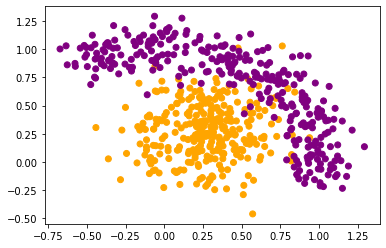

In [7]:
data,data_y=generate_data(300,5)
colors=['orange' if y<0 else 'purple' for y in data_y]
plt.scatter([p[0] for p in data],[p[1] for p in data],color=colors)
plt.show()

In [8]:
# An auxiliary function to extract predictions in 'visualize':
def f_hat(model):
    return lambda X: model.predict(X)

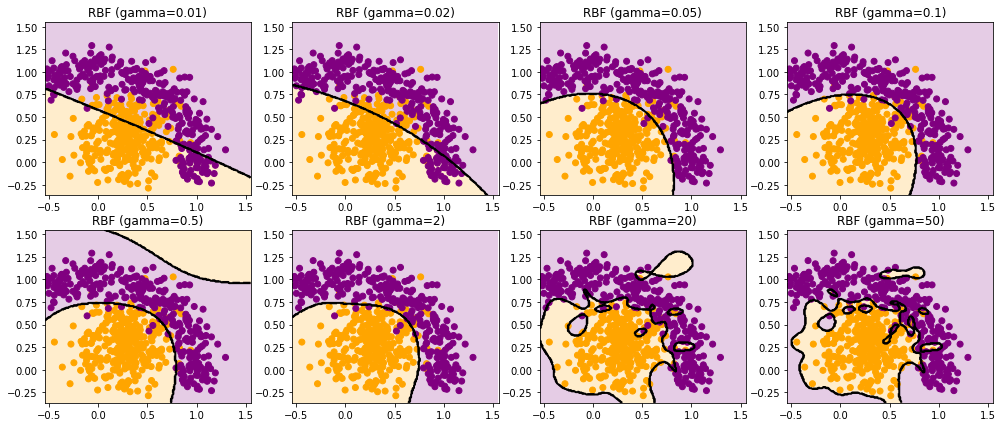

In [9]:
# The higher C values are associated to higher gamma values
# to exacerbate the "complexity" of the model:
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(17,7))
gammas=[0.005,0.01,0.02,0.05,0.1,0.5,2,20,50,100,200,400,800,1000]
show_start=1
models={}
for i,gamma in enumerate(gammas[show_start:show_start+8]):
    models[gamma]=SVC(C=5**i,kernel='rbf',gamma=gamma)
    axes[i//4,i%4].set_title(f"RBF (gamma={gamma})")
    models[gamma].fit(data,data_y)
    visualize(f_hat(models[gamma]),data,data_y,axis=axes[i//4,i%4],colors=['orange','purple'])

In order to get approximate values of bias and variance from the bias-variance decomposition, we will sample $m=30$ datasets with $n=200$ examples using our ```generate_data``` function. Then, for each value of $\gamma$, we will train 30 classifiers $\hat{f}_{\mathcal{F},\mathcal{D}_i}$. Then, using yet another dataset $\mathcal{D}_{test}$, we will use the following natural estimates:

\begin{align}
\bar{f}_{\mathcal{F}}&\sim\frac{1}{m}\sum_{i=1}^{m}\hat{f}_{\mathcal{F,\mathcal{D_i}}},\:\:\:\text{bias}^2\sim\frac{1}{n}\sum_{\mathcal{D}_{test}}\left(\frac{1}{m}\sum_{i=1}^{m}\hat{f}_{\mathcal{F,\mathcal{D_i}}}(x)-y\right)^2,\\
\text{variance}&\sim\frac{1}{n}\sum_{\mathcal{D}_{test}}\left(\hat{f}_{\mathcal{F},\mathcal{D}_i}(x)-\frac{1}{m}\sum_{i=1}^{m}\hat{f}_{\mathcal{F,\mathcal{D_i}}}(x)\right)^2
\end{align}

In [10]:
# Train m=30 models for all gammas:
datasets=[generate_data(100,5) for _ in range(30)]
models={}
for i,gamma in enumerate(gammas):
    models[gamma]=[]
    for data,data_y in datasets:
        models[gamma].append(SVC(C=5**i,kernel='rbf',gamma=gamma))
        models[gamma][-1].fit(data,data_y)

In [11]:
# An auxiliary function to extract predictions in 'visualize':
def f_bar(models):
    def predict(X):
        predictions=np.array([model.predict(X) for model in models])
        predictions=np.mean(predictions,axis=0)
        return np.array([-1 if pred<0 else 1 for pred in predictions])
    return predict

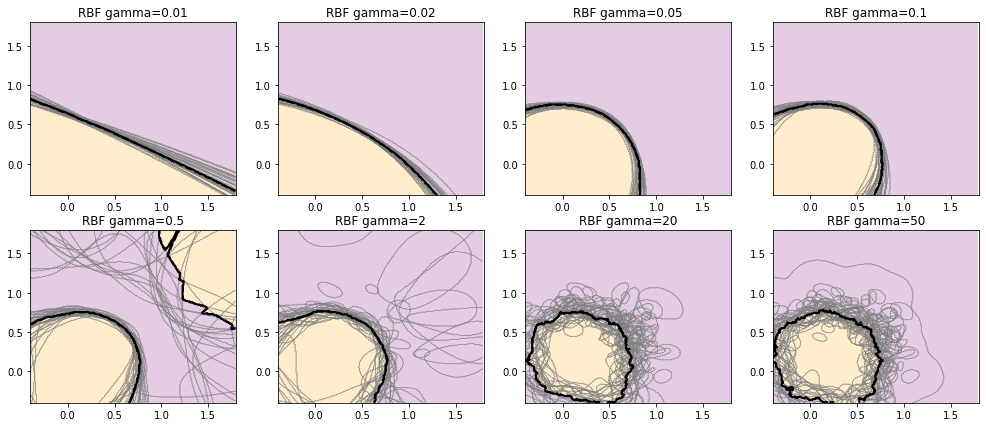

In [12]:
# Visualize the average model (bar{f}) for each gamma:
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(17,7))
for i,gamma in enumerate(gammas[show_start:show_start+8]):
    axes[i//4,i%4].set_title(f"RBF gamma={gamma}")
    visualize(f_bar(models[gamma]),aux_models=[f_hat(model) for model in models[gamma]],colors=['orange','purple'],axis=axes[i//4,i%4])

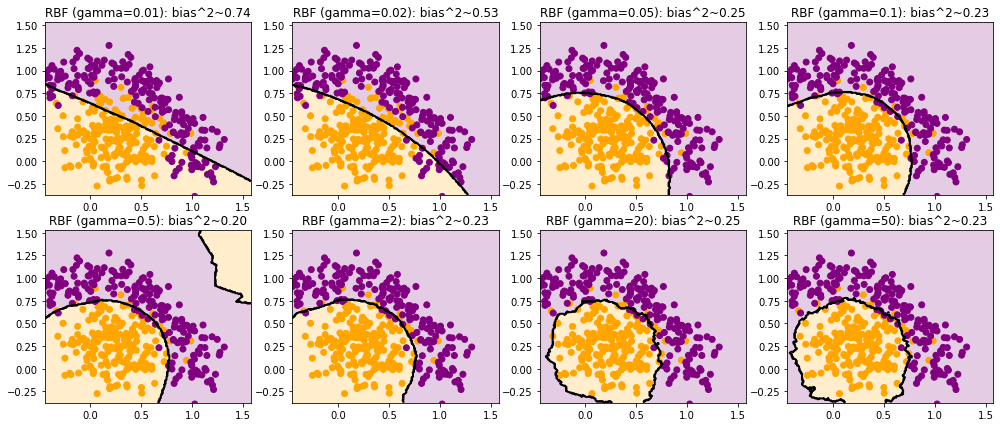

In [13]:
# Generate D(test) of another 400 examples and visualize bar{f} decision
# boundaries. Moreover, compute bias and variance estimates as defined above:
biases=[]
variances=[]
data,data_y=generate_data(200,5)
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(17,7))
for i,gamma in enumerate(gammas):
    bias_squared=np.mean([(p-y)**2 for p,y in zip(f_bar(models[gamma])(data),data_y)])
    variance=np.mean([[(p-y)**2 for p,y in zip(f_bar(models[gamma])(data),f_hat(model)(data))] for model in models[gamma]])
    biases.append(bias_squared)
    variances.append(variance)
    if i<show_start+8 and i>=show_start:
        visualize(f_bar(models[gamma]),data,data_y,colors=['orange','purple'],axis=axes[(i-show_start)//4,(i-show_start)%4])
        axes[(i-show_start)//4,(i-show_start)%4].set_title(f"RBF (gamma={gamma}): bias^2~{bias_squared:.2f}")

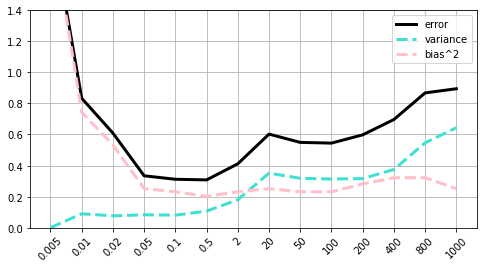

In [14]:
# Finally, plot the curves as well as their sum, which is the estimated
# expected risk (generalzation error):
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,4))
for i,gamma in enumerate(gammas):
    error=[b+v for b,v in zip(biases,variances)]
plt.plot(range(len(gammas)),error,label='error',color='k',linewidth=3)
plt.plot(range(len(gammas)),variances,label='variance',color='turquoise',linewidth=3,linestyle='dashed')
plt.plot(range(len(gammas)),biases,label='bias^2',color='pink',linewidth=3,linestyle='dashed')
plt.ylim((0,1.4))
plt.legend()
plt.xticks(range(len(gammas)),gammas,rotation=45)
plt.grid()
plt.show()

### *Time to Predict Elections 2020!*

In [15]:
# The decision tree model from Homework1 (I retrained it on a MinMax rescaled
# data in order to avoid any scaling issues with the 2020 pyTrends data):
def tree(inp):
    if inp.loc["trump"]<=0.393:
        if inp.loc["gun"]<=0.288:
            return False
        else:
            return True
    else:
        if inp.loc["immigration"]<=0.208:
            return True
        else:
            if inp.loc["obamacare"]<=0.866:
                return False
            else:
                return True

In [16]:
# Get the current data from PyTrends:
import pandas as pd
from pytrends.request import TrendReq
from sklearn.preprocessing import MinMaxScaler
pt=TrendReq(hl='en-US',retries=5)
search_words=[["trump"],["gun"],["immigration"],["obamacare"]]
scope='2020-10-19 2020-10-26'
data=pd.DataFrame()
for sw in search_words:
    pt.build_payload(sw,timeframe=scope,geo='US')
    data[sw]=pt.interest_by_region(resolution='REGION')

In [17]:
# Here are the results! (don't tell anyone...)
scaler=MinMaxScaler()
data.loc[:,np.squeeze(search_words)]=scaler.fit_transform(data.loc[:,np.squeeze(search_words)])
data["trumpWinner"]=[tree(data.loc[state,:]) for state in data.index]
elcol=[9,3,11,6,55,9,7,3,3,29,16,4,4,20,11,6,6,8,8,4,10,11,16,10,6,10,3,5,6,4,14,5,29,15,3,18,7,7,20,4,9,3,11,38,6,3,13,12,5,10,3]
data["college"]=elcol
print(f"the number of states (+DC) won by Trump in 2020: {sum(data['trumpWinner'])}/51")
trumpVotes=sum([w*v for w,v in zip(data['trumpWinner'],data['college'])])
print(f"expected number of electoral college votes cast for Trump in 2020: {trumpVotes}/{sum(data['college'])} ({100*trumpVotes/sum(data['college']):.2f}%)")
data.drop(data.columns[:-2],axis=1).sample(5)

the number of states (+DC) won by Trump in 2020: 18/51
expected number of electoral college votes cast for Trump in 2020: 157/538 (29.18%)


,trumpWinner,college
Nebraska,True,5
South Carolina,True,9
Florida,False,29
Texas,True,38
Indiana,True,11


In [ ]:
# How robust are our predictions? What if we use a different time window?
trumpVotes=[]
results=pd.DataFrame()
def get_result(start_day,end_day):
    pt=TrendReq(hl='en-US',retries=5)
    search_words=[["trump"],["gun"],["immigration"],["obamacare"]]
    scope=f'2016-10-{start_day} 2016-10-{end_day}'
    data=pd.DataFrame()
    for sw in search_words:
        pt.build_payload(sw,timeframe=scope,geo='US')
        data[sw]=pt.interest_by_region(resolution='REGION')
    scaler=MinMaxScaler()
    data.loc[:,np.squeeze(search_words)]=scaler.fit_transform(data.loc[:,np.squeeze(search_words)])
    data["trumpWinner"]=[tree(data.loc[state,:]) for state in data.index]
    elcol=[9,3,11,6,55,9,7,3,3,29,16,4,4,20,11,6,6,8,8,4,10,11,16,10,6,10,3,5,6,4,14,5,29,15,3,18,7,7,20,4,9,3,11,38,6,3,13,12,5,10,3]
    data["college"]=elcol
    results[start_day]=data["trumpWinner"]
    trumpVotes.append(100*sum([w*v for w,v in zip(data['trumpWinner'],data['college'])])/sum(data['college']))
start_dates=['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']
end_dates=['08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27']
for sd,ed in zip(start_dates,end_dates):
    get_result(sd,ed)

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,4))
plt.plot(start_dates,trumpVotes,color='pink',label='Trump',linewidth=4)
plt.axhline(50,end_dates[0],end_dates[-1],linestyle='dashed',color='k',label='50%')
plt.legend()
plt.xlabel(("end date of a 7-day period (Oct. 2020) "))
plt.ylabel(("electoral college votes (in %)"))
plt.ylim((0,100))
plt.grid()
plt.show()

In [ ]:
# How variable are individual predictions? What states are most "undecided"?
display(results)
results["mean prediction"]=np.mean(results.loc[:,start_dates].values,axis=1)
results["mean prediction"]=results["mean prediction"].apply(lambda x: True if x==1 else x)
results["mean prediction"]=results["mean prediction"].apply(lambda x: False if x==0 else x)
results["std. deviation"]=np.std(results.loc[:,start_dates].values,axis=1)
results["std. deviation"]=results["std. deviation"].apply(lambda x: 'Zero' if x==0 else x)
results.drop(start_dates,axis=1)